In [3]:
import pandas as pd

In [22]:
data = pd.read_csv('Fashion Dataset.csv')

In [23]:
data.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size..."


In [32]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec

# Load your dataframe (replace 'your_file.csv' with your actual file path)
# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text()
    return cleaned_text

# Function to preprocess text
def preprocess_text(text):
    # Check for NaNs
    if pd.isna(text):
        return []
    # Remove HTML tags
    text = remove_html_tags(text)
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply preprocessing to the 'description' column
data['clean_description'] = data['description'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(data['clean_description'], vector_size=100, window=5, min_count=1, workers=4)

# Now you can use 'word2vec_model' for further analysis

# Example: Get word vectors
word_vectors = word2vec_model.wv
vector = word_vectors['kurta']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
vector

array([ 2.58688736e+00,  1.38543427e-01,  2.38950536e-01, -1.13090122e+00,
        1.95516482e-01, -1.07499041e-01,  1.43838702e-02, -7.30591118e-01,
        5.46167850e-01, -3.74426782e-01,  8.87320220e-01,  4.30339664e-01,
        5.25487125e-01, -3.03813547e-01,  1.40451372e+00,  9.40308392e-01,
       -2.35498500e+00,  1.11643389e-01,  2.35688972e+00,  1.52400267e+00,
        3.45114410e-01, -3.31382044e-02, -1.03824830e+00,  1.87314880e+00,
       -7.76086628e-01, -6.21631920e-01,  2.07356915e-01,  3.19985151e-01,
        3.01411510e-01, -7.45396674e-01,  4.48749065e-01, -5.15221298e-01,
        2.06303000e+00,  7.34527171e-01, -8.38478744e-01, -1.37046188e-01,
       -1.25856996e+00, -2.43522659e-01, -1.00037670e+00,  4.00668919e-01,
       -1.20428771e-01,  2.04799533e+00,  3.60824168e-01,  1.04331672e+00,
       -5.92840791e-01, -1.83960843e+00,  1.32205695e-01,  1.04884946e+00,
        1.06302738e-01,  7.57793263e-02, -5.67600131e-01, -5.47326982e-01,
       -1.21338792e-01, -

In [24]:
df = data

In [33]:
df['description']

0        Black printed Kurta with Palazzos with dupatta...
1        Orange solid Kurta with Palazzos with dupatta<...
2        Navy blue embroidered Kurta with Trousers with...
3        Red printed kurta with trouser and dupatta<br>...
4        Black and green printed straight kurta, has a ...
                               ...                        
14325    Blue solid front-open sweatshirt has a mock co...
14326    Green printed sweatshirt has a hooded,  2 pock...
14327    Pink solid sweatshirt has a mock collar,  2 ka...
14328    Blue solid sweatshirt has a round neck, long s...
14329    Grey and green colourblocked sweatshirt has a ...
Name: description, Length: 14330, dtype: object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


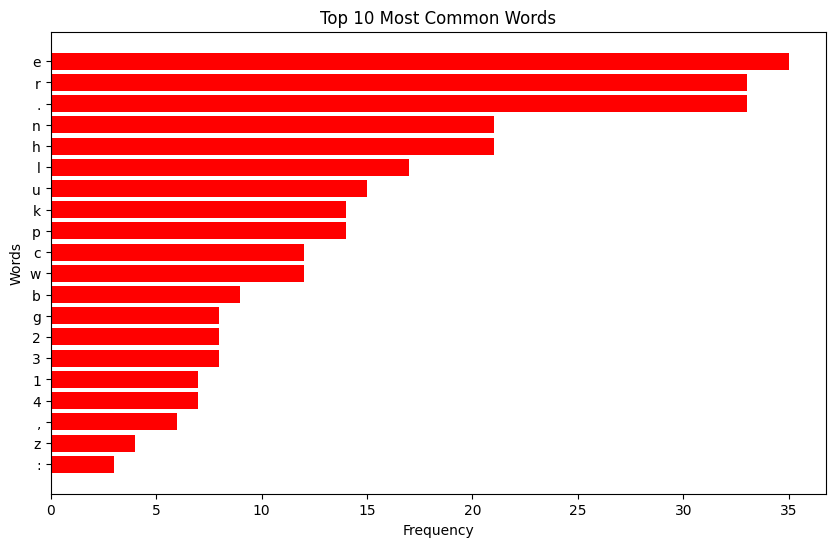

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# df['description'] = str(df['description'])
stop_words = set(stopwords.words('english'))
clean_descriptions = ' '.join(str(df['description']))
clean_descriptions = remove_html_tags(clean_descriptions)
clean_descriptions = clean_descriptions.lower().split()
clean_descriptions = [word for word in clean_descriptions if word not in stop_words]

# Create word frequency count
word_freq = Counter(clean_descriptions)

# Plot most common words
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.barh(common_words_df['Word'], common_words_df['Frequency'], color='red')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.gca().invert_yaxis()
plt.show()


In [35]:
common_words_df

,Word,Frequency
0,e,35
1,r,33
2,.,33
3,n,21
4,h,21
5,l,17
6,u,15
7,k,14
8,p,14
9,c,12


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


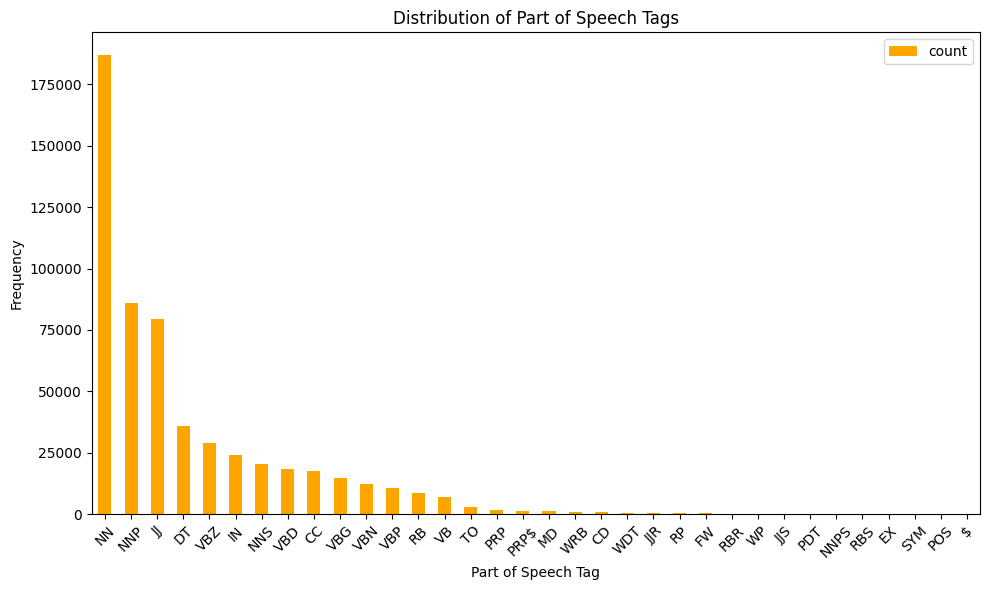

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

# Assuming df is your DataFrame with a column named clean_description
# Example: df = pd.read_csv('your_data.csv')

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize and tag part of speech for each description
pos_tags = []
for description in df['description']:
    description = re.sub(r'[^a-zA-Z\s]', '', str(description))
    tokens = word_tokenize(str(description))
    pos_tags.extend(pos_tag(tokens))

# Count the occurrences of each POS tag
pos_counts = Counter(tag for word, tag in pos_tags)

# Plot the distribution of POS tags
plt.figure(figsize=(10, 6))
pos_df = pd.DataFrame.from_dict(pos_counts, orient='index', columns=['count'])
pos_df = pos_df.sort_values(by='count', ascending=False)
pos_df.plot(kind='bar', ax=plt.gca(), color='orange')
plt.title('Distribution of Part of Speech Tags')
plt.xlabel('Part of Speech Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Observation : Here the main observation is almost all the description is full of NN and NNP which suggests that preserving the context will not be that much useful which also means that using Bag of words or TF-IDF will tend similar results as compared to Word2vec.

## Another observation is Description is somewhat based on high level features of image and no other extra terms are used such as adjective to complicate it which give us the intuition that using a good model for extracting features out of the image will not give exponential better results but might make some addition. Usually image carries a lot of information as compared to text but here it was observed that both are relatively same on some scale.

In [54]:
df['clean_description']

0        [black, printed, kurta, palazzos, dupatta, kur...
1        [orange, solid, kurta, palazzos, dupattakurta,...
2        [navy, blue, embroidered, kurta, trousers, dup...
3        [red, printed, kurta, trouser, dupattakurta, d...
4        [black, green, printed, straight, kurta, nitch...
                               ...                        
14325    [blue, solid, frontopen, sweatshirt, mock, col...
14326    [green, printed, sweatshirt, hooded, pockets, ...
14327    [pink, solid, sweatshirt, mock, collar, kangar...
14328    [blue, solid, sweatshirt, round, neck, long, s...
14329    [grey, green, colourblocked, sweatshirt, round...
Name: clean_description, Length: 14330, dtype: object

In [55]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataframe (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('Fashion Dataset.csv')

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    cleaned_text = soup.get_text()
    return cleaned_text

# Function to preprocess text
def preprocess_text(text):
    # Check for NaNs
    # if pd.isna(text):
    #     return []
    # Remove HTML tags
    text = str(text)
    text = remove_html_tags(text)
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply preprocessing to the 'description' column
df['clean_description'] = df['description'].apply(preprocess_text)

# Remove rows where 'clean_description' is empty
df = df[df['clean_description'].apply(len) > 0]

# Train Word2Vec model
word2vec_model = Word2Vec(df['clean_description'], vector_size=100, window=5, min_count=1, workers=4)

# Function to get word embeddings
def get_word_embeddings(query):
    query_tokens = preprocess_text(query)
    embeddings = []
    for token in query_tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if not embeddings:
        return None
    return sum(embeddings) / len(embeddings)

# Function to recommend similar descriptions
def recommend_similar_descriptions(query, top_n=5):
    query_embedding = get_word_embeddings(query)
    if query_embedding is None:
        return "No relevant recommendations found."
    df['description_embedding'] = df['clean_description'].apply(lambda x: get_word_embeddings(' '.join(x)))
    df.dropna(subset=['description_embedding'], inplace=True)  # Drop NaN values
    df['similarity'] = df['description_embedding'].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])
    recommended_df = df.sort_values(by='similarity', ascending=False).head(top_n)
    return recommended_df[['description', 'similarity']]

# Example usage
query = " "
recommendations = recommend_similar_descriptions(query)
print(recommendations)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


No relevant recommendations found.


In [ ]:
similarity = pd.read_json('pratham_multi_modal_similarity.json')

In [ ]:
similarity

In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
check = pd.DataFrame()
count = 0
for i in df['description']:
  query = i
  recommendations = recommend_similar_descriptions(query)
  check = check.append(recommendations)
  count+=1
  print(count)

1
2
3
4
5
6


KeyboardInterrupt: 

In [ ]:
# vocab = list(word2vec_model.wv.index_to_key)
# vocab = [word for word in word2vec_model.wv.index_to_key if not np.any(np.isnan(word2vec_model.wv[word]))]
import numpy as np
# Calculate cosine similarity for each pair of words in the vocabulary
# Get vocabulary and filter out NaN values
vocab = [word for word in word2vec_model.wv.index_to_key if not np.any(np.isnan(word2vec_model.wv[word]))]

# Calculate cosine similarity for each pair of words in the vocabulary
cosine_similarities = {}
for i, word1 in enumerate(vocab):
    for j, word2 in enumerate(vocab):
        if i != j:  # Exclude self-comparison
            vec1, vec2 = word2vec_model.wv[word1], word2vec_model.wv[word2]
            if not (np.any(np.isnan(vec1)) or np.any(np.isnan(vec2))):
                cosine_similarities[(word1, word2)] = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Now cosine_similarities contains the cosine similarity scores for all word pairs in the filtered vocabulary